In [54]:
import pickle
import numpy as np
import neorl2

In [154]:
policy_path = "logs/bc_na/policy.pkl"

policy_revive = pickle.load(open(policy_path, 'rb'))
env = neorl2.make('RocketRecovery')
actions = []
re_list = []
for traj in range(1):
    obs,_ = env.reset()
    
    re_turn = []
    done = False
    timeout = False
    while not done and not timeout:
        action = policy_revive.infer({'rocket_state': obs[...,:-1],'wind_speed': obs[...,-1:]})
        next_state, reward, done, timeout,_ = env.step(action)
        actions.append(action)
        re_turn.append(reward)
        obs = next_state
    
    print(len(re_turn), np.sum(np.array(re_turn)[:]))
    re_list.append(np.sum(re_turn))

print('mean return:',np.mean(re_list), ' std:',np.std(re_list), ' normal_score:', env.get_normalized_score(np.mean(re_list)))

500 -2429.59725420177
mean return: -2429.59725420177  std: 0.0  normal_score: -586.8742849483776


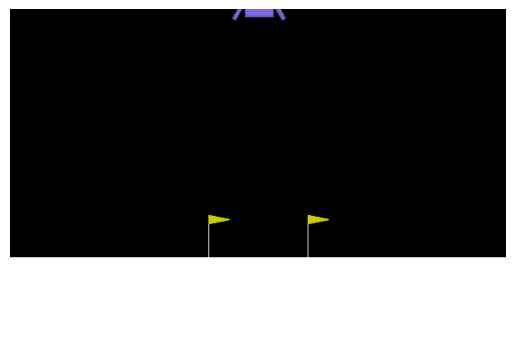

In [116]:
import gym
import neorl2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 创建LunarLander环境
env = neorl2.make('RocketRecovery')

# 初始化环境
observation,_ = env.reset()

# 创建一个空的图形列表
frames = []
actions = []
done = False
while not done:
    # 将当前图像帧添加到列表中
    frames.append(env.render())
    
    # 在环境中采取随机动作
    #action = env.action_space.sample()
    action = policy_revive.infer({'rocket_state': observation[...,:-1],'wind_speed': observation[...,-1:]})
    # 执行动作并获取下一个状态、奖励和完成标志
    observation, reward, done, info,_ = env.step(action)
    actions.append([action])

# 关闭环境
env.close()

# 创建一个动画
fig = plt.figure()
plt.axis("off")

# 将图像帧转换为动画
im = plt.imshow(frames[0])

def update(frame):
    im.set_data(frame)

# 更新动画帧
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

# 保存动画为GIF文件
ani.save('lunar_lander_visualization.gif', writer='pillow')

In [82]:
observation

array([-0.3715745 ,  0.03888768, -0.44388026, -0.84733427, -0.12735023,
       -0.0358339 , -0.81737566], dtype=float32)

In [18]:
policy_revive._policy_model.node.network

FeedForwardPolicy(
  (backbone): MLP(
    (net): Sequential(
      (0): Linear(in_features=7, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.1, inplace=True)
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): LeakyReLU(negative_slope=0.1, inplace=True)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): LeakyReLU(negative_slope=0.1, inplace=True)
      (6): Linear(in_features=256, out_features=256, bias=True)
      (7): LeakyReLU(negative_slope=0.1, inplace=True)
      (8): Linear(in_features=256, out_features=4, bias=True)
      (9): Identity()
    )
  )
  (dist_wrapper): DistributionWrapper(
    type=mix, dim=1
    (wrapper_list): ModuleList(
      (0): DistributionWrapper(type=normal, dim=2)
    )
  )
)